# **Wolseley's Boulevard Gardens** 
#### _A project by Julia-Simone Rutgers_
##### _Note: See [boulevard_gardens_cleaning] for data compiling and cleaning process_

#### ANALYSIS NOTEBOOK

I have compiled a list of addresses in the Wolseley neighbourhood including the address, point and polygon geometry, assessed property value and **most importantly** whether or not that property has planted a garden on the boulevard — a strip of legally grey land _technically_ owned by the city, but often maintained by the property owner. 

According to Winnipeg's [neighbourhood liveability bylaws](https://clkapps.winnipeg.ca/dmis/docext/ViewDoc.asp?DocumentTypeId=1&DocId=3996), boulevard gardens are permitted on most streets so long as they adhere to a handful of rules about placement, vegetation type, vegetation height and utility access. If you want to plant a boulevard garden that does _not_ adhere to those rules, you need to apply for a permit and pay $46.

Most of the time, these gardens go off without a hitch. Sometimes, neighbours call in 311 complaints, and occaisionally the city inspectors take notice. These gardens are also natural infrastructure solutions, helping absorb excess storm runoff and reduce flood risks and sewer overflows, as well aiding in cooling the street, and providing biodiversity to support the urban ecosystem. As a resident, I love the dense wildflower patches that seem to teem with native bees in the spring and summer. They're a bright spot in the neighbourhood — and my neighbourhood seems to have more gardens than most. 


I decided to tour the streets (literally every single street) to find out how many, where they're located, and whether there are trends linking the presence of gardens to property values. I initially suspected the southern and western parts of the neighbourhood (anecdotally considered the wealthier part of a very mixed-income area) would have a higher density of gardens. I don't know, after data collection, if that's actually the case. Let's find out...


In [1]:
# install tools
import pandas as pd
import matplotlib
import geopandas as gpd
import numpy as np

In [2]:
# read in compiled gardens csv 
df=pd.read_csv("wolseley_gardens_final_old.csv")

In [3]:
df

,roll_number,full_address,has_garden,total_assessed_value,street_number,street_name,property_use_code,geometry,centroid_lat,centroid_lon
0,1.208178e+10,1 LENORE STREET,False,232000.0,1.0,LENORE,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17150633999906 49.87741594...,49.877380,-97.171700
1,1.208269e+10,1-130 ETHELBERT STREET,False,452000.0,130.0,ETHELBERT,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.1679152061011 49.880671003...,49.880723,-97.167717
2,1.208232e+10,1-156 EVANSON STREET,False,643000.0,156.0,EVANSON,RESTR - TRIPLEX,MULTIPOLYGON (((-97.17075433751634 49.88213778...,49.882100,-97.170927
3,1.208258e+10,1-230 HOME STREET,False,504000.0,230.0,HOME,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.16846992448545 49.88357347...,49.883535,-97.168686
4,1.208234e+10,1-273 EVANSON STREET,False,486000.0,273.0,EVANSON,RESDU - DUPLEX,MULTIPOLYGON (((-97.17033900169139 49.88433314...,49.884369,-97.170166
...,...,...,...,...,...,...,...,...,...,...
2479,1.208173e+10,990 PALMERSTON AVENUE,False,677000.0,990.0,PALMERSTON,RESDU - DUPLEX,MULTIPOLYGON (((-97.17380593689371 49.87648087...,49.876895,-97.173870
2480,1.208173e+10,994 PALMERSTON AVENUE,False,773000.0,994.0,PALMERSTON,RESDU - DUPLEX,MULTIPOLYGON (((-97.1739956167079 49.876496214...,49.876905,-97.174060
2481,1.208173e+10,998 PALMERSTON AVENUE,False,764000.0,998.0,PALMERSTON,RESDU - DUPLEX,MULTIPOLYGON (((-97.17437470610963 49.87653568...,49.876918,-97.174250
2482,NaN,old_grace EVANSON STREET,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Which streets have the most gardens?

In [4]:
df.groupby('street_name')['has_garden'].sum().sort_values(ascending=False).head(5)

street_name
ETHELBERT    30
GARFIELD     28
LENORE       25
SHERBURN     23
EVANSON      23
Name: has_garden, dtype: int64

<Axes: title={'center': 'Number of boulevard gardens on each street in Wolseley'}, ylabel='street_name'>

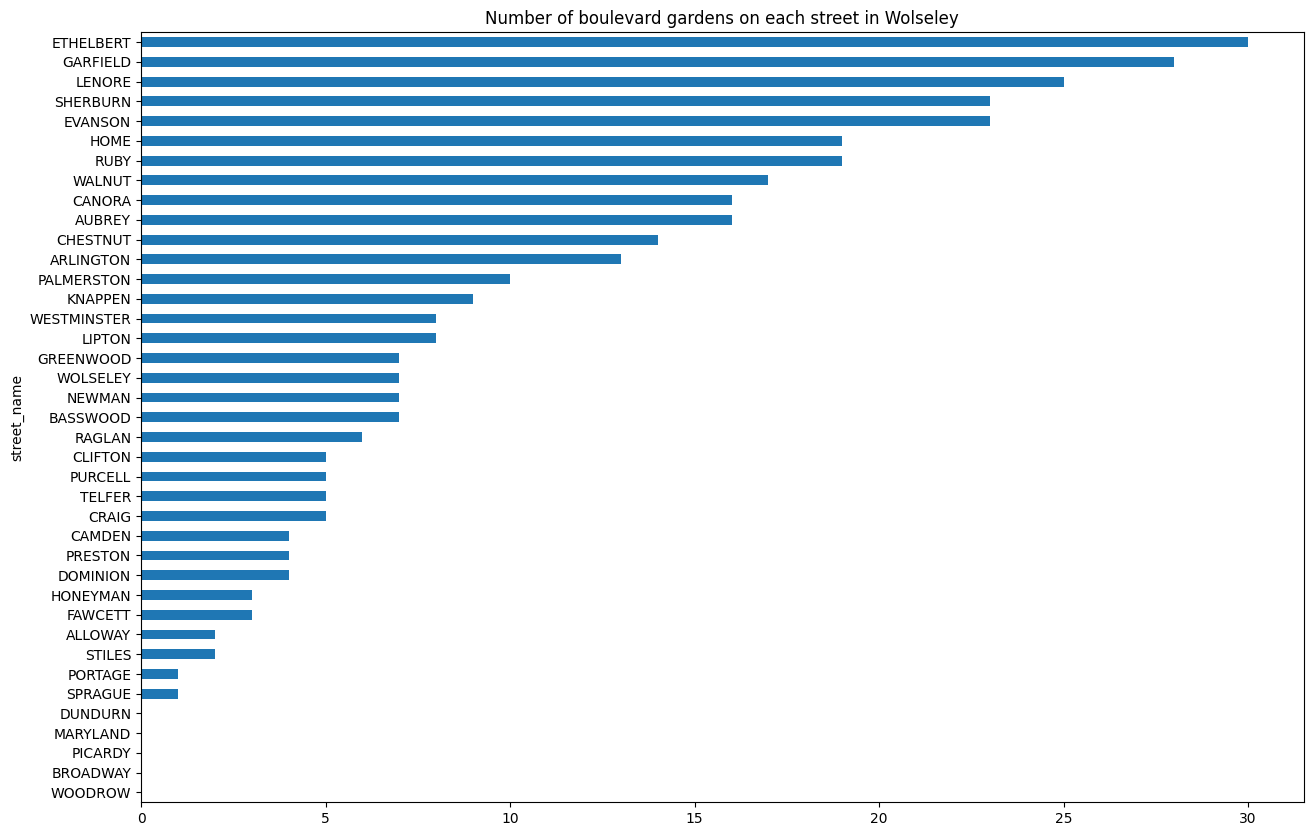

In [5]:
df.groupby('street_name')['has_garden'].sum().sort_values().plot(
    kind='barh', 
    figsize=(15,10), 
    title='Number of boulevard gardens on each street in Wolseley')

#### The top streets are:
- Ethelbert
- Garfield
- Lenore
- Sherburn
- Evanson

All of these are located in what I would consider the central part of the neighbourhood. 
Let's go deeper...

### Which are the _richest_ streets in Wolseley?
(in this case assuming wealth can be tied to property value, rather than pulling in another data set...)

In [6]:
# This is just to fix up the number format...
pd.set_option('display.float_format', '{:.0f}'.format)

# And this is to look at average property value on each street
df.groupby('street_name')['total_assessed_value'].mean().sort_values(ascending=False)

street_name
PORTAGE       1371415
WOLSELEY       659440
WOODROW        635794
PALMERSTON     606494
MARYLAND       549315
RAGLAN         527579
GREENWOOD      491183
ETHELBERT      452800
WESTMINSTER    446136
ALLOWAY        430609
HOME           422822
PRESTON        422294
PICARDY        421722
CANORA         421542
ARLINGTON      419881
DOMINION       418025
LENORE         397886
RUBY           376632
DUNDURN        368889
EVANSON        368467
LIPTON         367647
SPRAGUE        367240
CHESTNUT       364248
GARFIELD       356578
PURCELL        348731
SHERBURN       338037
WALNUT         337506
BASSWOOD       336868
HONEYMAN       330600
NEWMAN         328520
AUBREY         321916
TELFER         307203
CLIFTON        304795
CAMDEN         303333
FAWCETT        301883
CRAIG          299426
BROADWAY       297000
STILES         294125
KNAPPEN        263900
Name: total_assessed_value, dtype: float64

In [7]:
len(df.groupby('street_name')['total_assessed_value'].mean().sort_values(ascending=False))

39

<Axes: title={'center': 'Average property value of buildings on each Wolseley street, with five greenest streets highlighted'}, ylabel='street_name'>

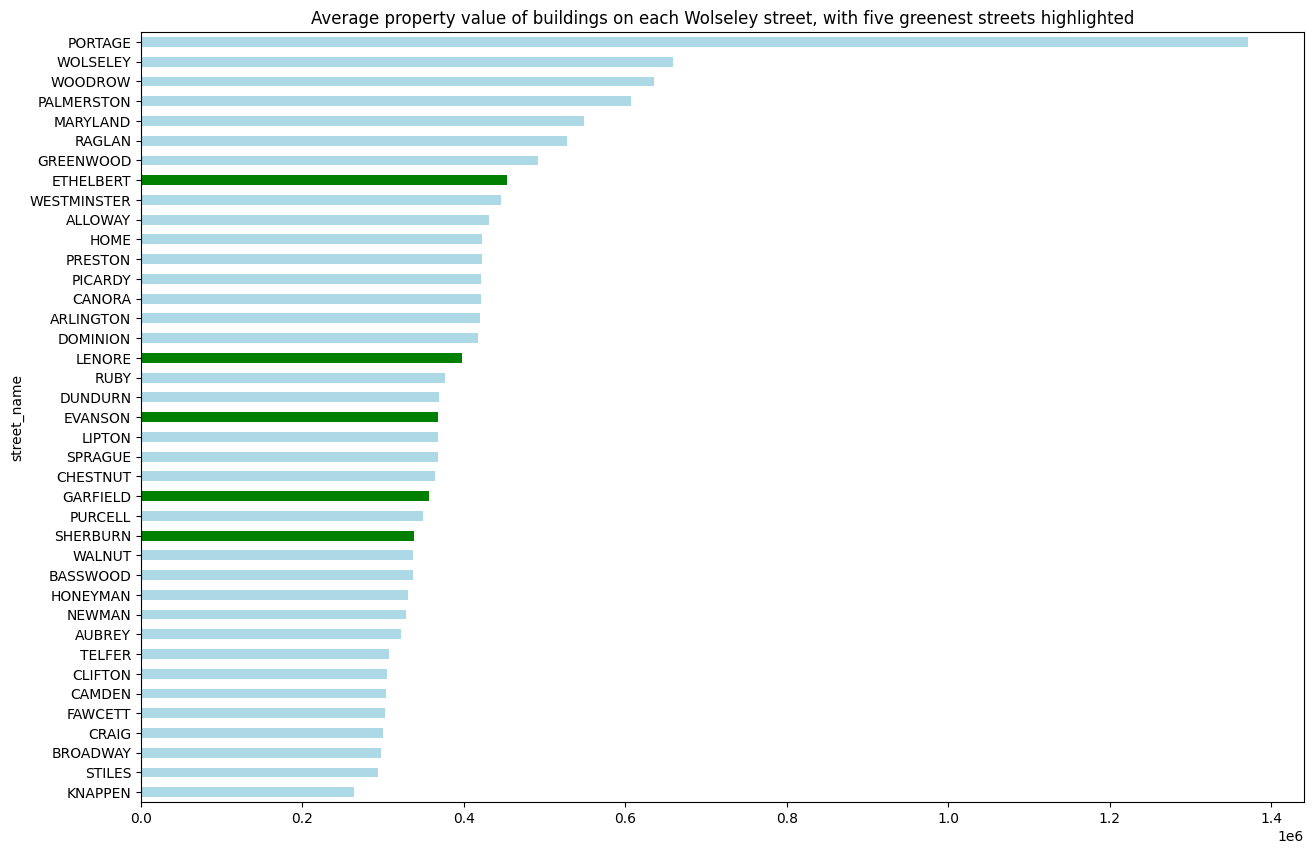

In [8]:
# Going to plot this again because, well, it's nicer to look at

# Within this plot, I'm also going to highlight our top 5 garden streets
# I found this suggestion on r/learnpython please blame reddit and not me if it doesn't make sense

colors = ['lightblue'] * 39
# where 39 is number of streets

top_gardens = [13,15,19,22,31]
# counting from the bottom of the above list, because the sorting will be reversed in the plot
for garden in top_gardens:
    colors[garden] = 'g'

# Now let's plot
df.groupby('street_name')['total_assessed_value'].mean().sort_values().plot(
    kind='barh', 
    figsize=(15,10), 
    title='Average property value of buildings on each Wolseley street, with five greenest streets highlighted',
    color = colors
)

#### WOAH NELLY! What's happening here?

Some context for the dear reader that I probably should have outlined much earlier. 

This is Wolseley: ![an outline of the Wolseley neighbourhood](https://roadtripmanitoba.com/wp-content/uploads/2023/07/Wolseley-Map.jpg)

The northern boundary is Portage Avenue, aka Highway 1, a major artery through the city (through the country, actually, but that's a story for another day) that is predominantly made up of commercial and insitutional buildings. The southern boundary is the Assiniboine River, one of the two major rivers that gave Winnipeg its name (from the Cree for muddy waters). The eastern boundary is Maryland Street, another commercial strip. And the western boundary is a large park called Omand's Creek and a set of train tracks. The two main east-west roads are Wolseley and Westminster Avenues, which are a mix of residential homes, multi-unit complexes and commercial builings. 

Therefore, Portage Ave, Wolseley Ave, Westminster Ave and Maryland St have higher property values than most. 

So I need to go a little deeper...

### ASSIGNING A BLOCK:

I hemmed and hawed for a looong time over whether I should do this, but I fear it's the only way to really understand what's happening here. 

I need to assign a 'block' to each row to understand where exactly the money is compared to the gardens.

These blocks are assigned as follows:

- For the west streets from Raglan Rd to Greenwood Pl, the length of the street from Wolseley to Portage is one block
- For central streets from Dominion to Walnut there are two block: one north of Westminster and another south of Westminster
- East-west avenues are counted as one block

Unfortunately, I cannot figure out how to code this in a way that feels within my skillset at the moment, and it's not too painful to do manually...

In [9]:

# block_ranges = [
#     {
#      'street_name': 'DOMINION','north': range(508,539),'south': range(441,506)
#     },
#     { 
#    'street_name': 'GARFIELD', 'north':range(200,265),'south':range(104,163)
#     },
#      { 
#     'street_name': 'SHERBURN', 'north':range(159,240),'south':range(33,156)
#     },
#       { 
#     'street_name': 'AUBREY', 'north':range(248,329),'south':range(20,233)
#     },
#       { 
#     'street_name': 'LIPTON', 'north':range(165,246),'south':range(11,162)
#     },
#       { 
#     'street_name': 'RUBY', 'north':range(154,253),'south':range(2,134)
#     },
#       { 
#     'street_name': 'LENORE', 'north':range(145,243), 'south':range(1,130)
#     },
#     { 
#     'street_name': 'EVANSON', 'north':range(153,253),'south':range(6,145)
#     },
#     { 
#     'street_name': 'ARLINGTON', 'north':range(144,258),'south':range(14,141)
#     },
#     { 
#     'street_name': 'HOME', 'north':range(162,272),'south':range(32,160)
#     },
#     { 
#     'street_name': 'ETHELBERT', 'north':range(160,227),'south':range(58,157)
#     },
#     { 
#     'street_name': 'CANORA', 'north':range(145,249),'south':range(73,143)
#     },
#     { 
#     'street_name': 'CHESTNUT', 'north':range(151,240),'south':range(58,135)
#     },
#     { 
#     'street_name': 'WALNUT', 'north':range(134,229),'south':range(54,128)
#     },
# ]


In [10]:
# I'm going to read in the manually updated spreadsheet:

df = pd.read_csv("wolseley_gardens_blocks_final.csv")

In [11]:
df

,roll_number,full_address,has_garden,total_assessed_value,block_id,street_number,street_name,property_use_code,geometry,centroid_lat,centroid_lon
0,12090209000,11 ALLOWAY AVENUE,False,446000,44,11,ALLOWAY,RESDU - DUPLEX,MULTIPOLYGON (((-97.16159622354756 49.88386022...,50,-97
1,12090224000,14 ALLOWAY AVENUE,False,2249000,44,14,ALLOWAY,RESAP - APARTMENTS,MULTIPOLYGON (((-97.1617567933703 49.883409631...,50,-97
2,12090207000,19 ALLOWAY AVENUE,False,299000,44,19,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16174400231601 49.88359032...,50,-97
3,12090223000,20 ALLOWAY AVENUE,False,230000,44,20,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16189307451094 49.88341357...,50,-97
4,12090222000,22 ALLOWAY AVENUE,False,349000,44,22,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16203922859602 49.88341780...,50,-97
...,...,...,...,...,...,...,...,...,...,...,...
2479,12090003000,50 WOODROW PLACE,False,352000,47,50,WOODROW,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.1630702544923 49.879525370...,50,-97
2480,12090002000,52 WOODROW PLACE,False,435000,47,52,WOODROW,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16323967914919 49.87953114...,50,-97
2481,12090015000,58 WOODROW PLACE,False,324000,47,58,WOODROW,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.16323177852061 49.87964359...,50,-97
2482,NaN,old_grace EVANSON STREET,True,NaN,25,NaN,EVANSON,NaN,NaN,NaN,NaN


In [12]:
# I AM SENSING DIMINISHING RETURNS.

# I NEED TO RESTRAIN MYSELF

# MAKE SOME GRAPHICS WITH WHAT WE HAVE

# PUT IT ON A WEBSITE AND MOVE ON

In [13]:
by_street = {'street':df['street_name'].unique(), 'count': df.groupby('street_name')['full_address'].nunique(), 'gardens':df.groupby('street_name')['has_garden'].sum()}

In [14]:
by_street = pd.DataFrame.from_dict(by_street) 

In [15]:
by_street.drop(columns = 'street', inplace=True)
by_street

,count,gardens
street_name,,
ALLOWAY,23,2
ARLINGTON,126,13
AUBREY,119,16
BASSWOOD,53,7
BROADWAY,9,0
CAMDEN,48,4
CANORA,72,16
CHESTNUT,101,14
CLIFTON,44,5


In [16]:
pd.set_option('display.float_format', '{:.3f}'.format)
# Now to add density (aka gardens per number of homes)

by_street['density'] = by_street['gardens']/by_street['count']

In [17]:
by_street

,count,gardens,density
street_name,,,
ALLOWAY,23,2,0.087
ARLINGTON,126,13,0.103
AUBREY,119,16,0.134
BASSWOOD,53,7,0.132
BROADWAY,9,0,0.000
CAMDEN,48,4,0.083
CANORA,72,16,0.222
CHESTNUT,101,14,0.139
CLIFTON,44,5,0.114


In [18]:
# And add the average property value

by_street['average_value'] = df.groupby('street_name')['total_assessed_value'].mean()

In [19]:
by_street

,count,gardens,density,average_value
street_name,,,,
ALLOWAY,23,2,0.087,430608.696
ARLINGTON,126,13,0.103,419880.952
AUBREY,119,16,0.134,321915.966
BASSWOOD,53,7,0.132,336867.925
BROADWAY,9,0,0.000,297000.000
CAMDEN,48,4,0.083,303333.333
CANORA,72,16,0.222,421541.667
CHESTNUT,101,14,0.139,364247.525
CLIFTON,44,5,0.114,304795.455


In [20]:
# Hooray! This is all the complexity I will go to, though I would have liked to dig a little deeper. 

# It's a challenge for me to learn when to pull back from things! 

# Graphs will come from here

# For now, export to csv

by_street.to_csv("gardens_street_analysis.csv")

<Axes: title={'center': 'Garden density on Wolseley streets'}, ylabel='street_name'>

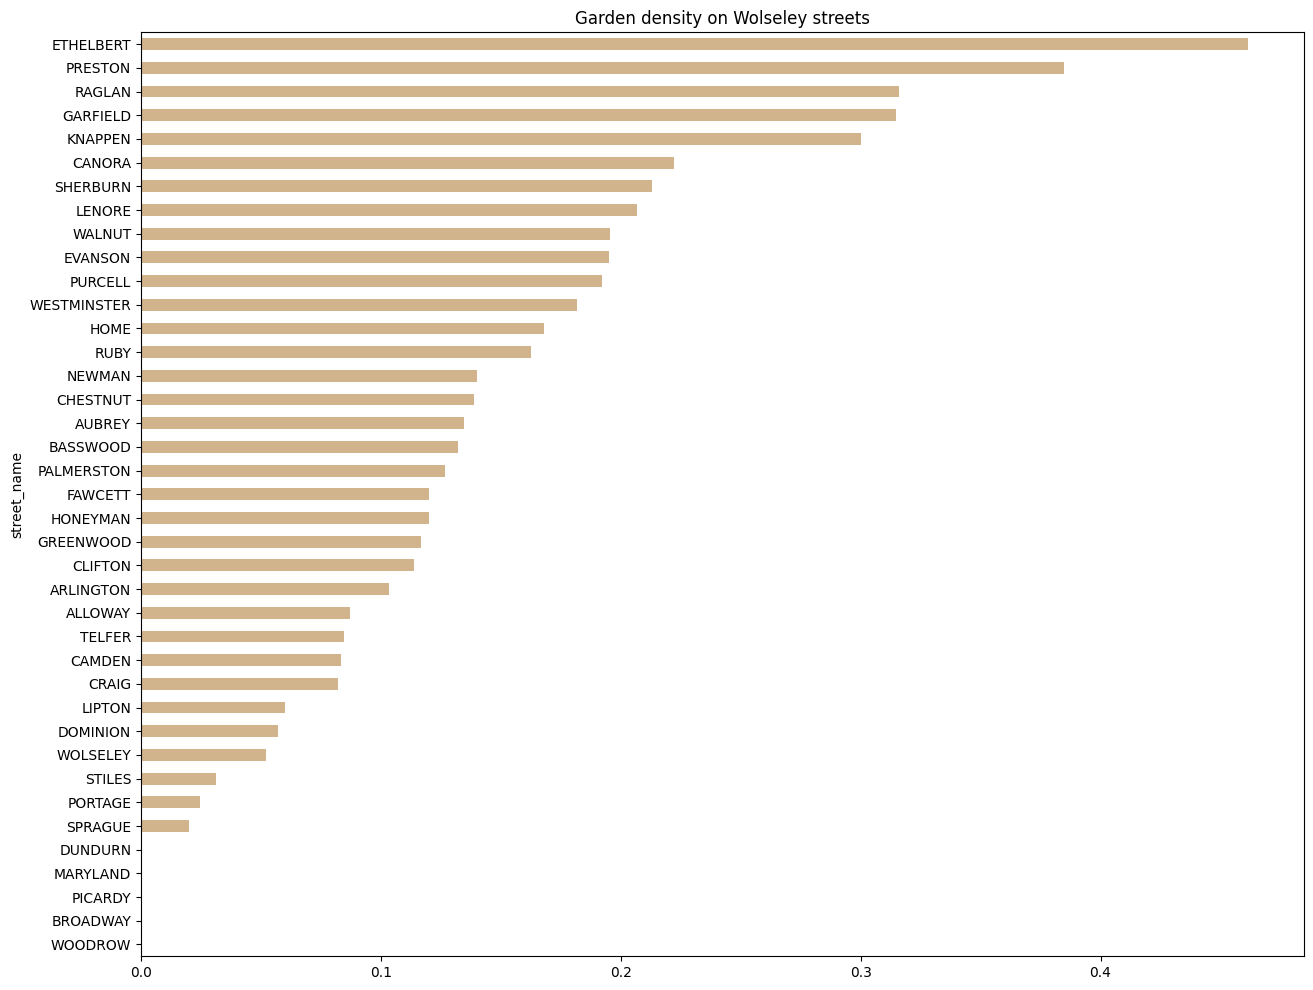

In [21]:
by_street['density'].sort_values().plot(
    kind='barh',
    color='tan',
    figsize=(15,12),
    title='Garden density on Wolseley streets'
)

## Gardens per 100 homes

In [49]:
# For all of Wolseley:

(df['has_garden'].sum()/df['full_address'].nunique())*100

np.float64(14.349052801289803)

Across the neighbourhood, there are approximately **14.3 gardens per 100 homes**

<Axes: ylabel='street_name'>

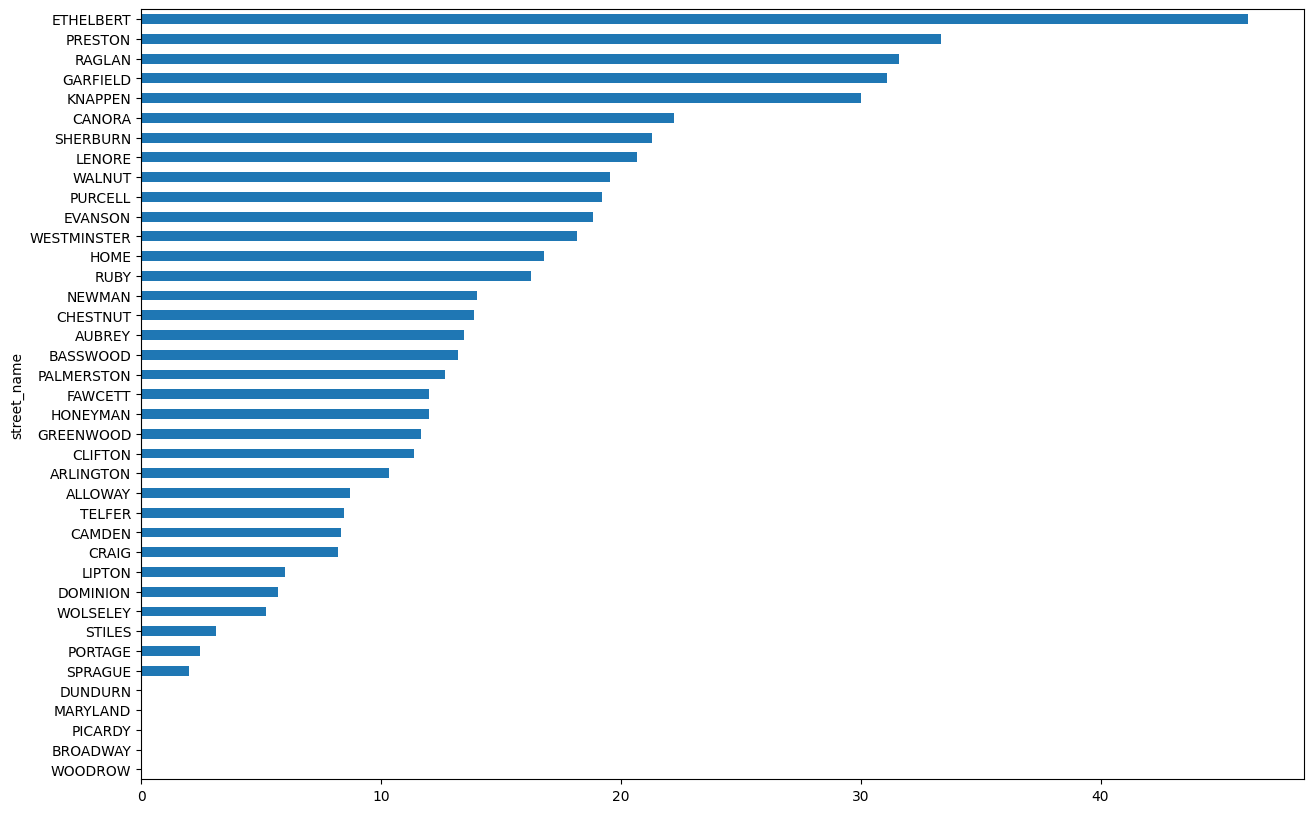

In [56]:
# For each block:

((df.groupby('street_name')['has_garden'].sum()/df.groupby('street_name')['roll_number'].nunique())*100).sort_values().plot(
    kind = 'barh',
    figsize=(15,10)
)

In [62]:
# Looking at Ethelbert... 
# Let's see which block has the most gardens...

# North block: house number >= 170
# Central block: 157 > house number > 105
# South block: house number <= 82

ethelbert = df[df['street_name'] == 'ETHELBERT']

ethelbert[ethelbert['street_number'] >= 170].has_garden.sum()

np.int64(10)

In [73]:
ethelbert[ethelbert['street_number'] <= 157].has_garden.sum()

np.int64(20)

In [75]:
ethelbert[ethelbert['street_number'] >= 170].total_assessed_value.mean()

np.float64(426576.92307692306)

In [77]:
ethelbert[ethelbert['street_number'] <= 82].total_assessed_value.mean()

np.float64(484909.0909090909)

## Property values // gardens

In [79]:
# Looking at the properties that have gardens
with_garden = df[df['has_garden']==True]

In [80]:
with_garden

,roll_number,full_address,has_garden,total_assessed_value,block_id,street_number,street_name,property_use_code,geometry,centroid_lat,centroid_lon
11,12090219000.000,38 ALLOWAY AVENUE,True,513000.000,44.000,38.000,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16231891160473 49.88342589...,49.883,-97.162
19,12090189000.000,51 ALLOWAY AVENUE,True,404000.000,44.000,51.000,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16290754293672 49.88389805...,49.884,-97.163
23,12082138000.000,14 ARLINGTON STREET,True,307000.000,28.000,14.000,ARLINGTON,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17043887041784 49.87772508...,49.878,-97.170
24,12082139000.000,16 ARLINGTON STREET,True,290000.000,28.000,16.000,ARLINGTON,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17043184695773 49.87782092...,49.878,-97.170
28,12082410000.000,21 ARLINGTON STREET,True,249000.000,28.000,21.000,ARLINGTON,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16939364332399 49.87800198...,49.878,-97.170
...,...,...,...,...,...,...,...,...,...,...,...
2452,12082890000.000,830 WOLSELEY AVENUE,True,678000.000,49.000,830.000,WOLSELEY,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.16578851939897 49.87924054...,49.879,-97.166
2457,12082736000.000,852 WOLSELEY AVENUE,True,312000.000,49.000,852.000,WOLSELEY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.1673606674682 49.879119351...,49.879,-97.167
2462,12082740000.000,867 WOLSELEY AVENUE,True,601000.000,49.000,867.000,WOLSELEY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16714868681586 49.87968113...,49.880,-97.167
2463,12082702000.000,871 WOLSELEY AVENUE,True,329000.000,49.000,871.000,WOLSELEY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16779689146172 49.87969839...,49.880,-97.168


In [86]:
# What is the distribution of property values among these properties?

with_garden['total_assessed_value'].describe()

count       356.000
mean     423192.494
std      580647.609
min      142527.780
25%      307000.000
50%      355000.000
75%      417000.000
max     9110000.000
Name: total_assessed_value, dtype: float64

<Axes: >

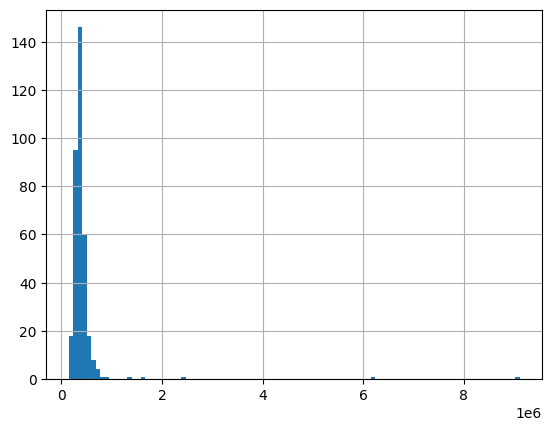

In [94]:
with_garden['total_assessed_value'].hist(bins=100)

In [109]:
# We have some outliers, notably the major apartments etc. 
#Let's filter out: apartments(total land value is skewed), stores, medical office, strip mall and non-residential group care

with_garden.property_use_code.unique()

array(['RESSD - DETACHED SINGLE DWELLING', 'RESAP - APARTMENTS',
       'RESMC - MULTIFAMILY CONVERSION', 'RESRM - ROOMING HOUSE',
       'RESDU - DUPLEX', 'PIIGC - NON-RESIDENTIAL GROUP CARE',
       'RESMU - RESIDENTIAL MULTIPLE USE', 'CMSTP - STRIP MALL',
       'CNCMP - CONDO COMPLEX', 'RESSS - SIDE BY SIDE', 'CMRST - STORE',
       'CMOMC - MEDICAL OFFICE CLINIC'], dtype=object)

<Axes: >

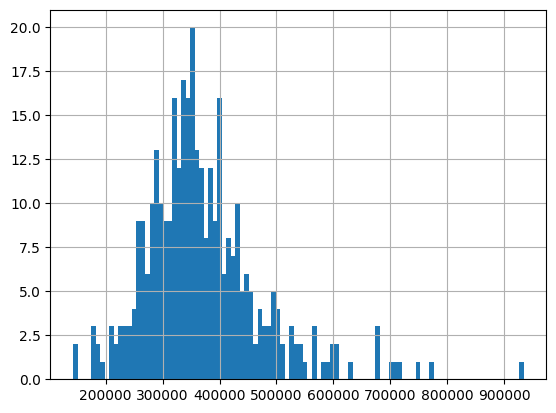

In [107]:
with_garden[with_garden['property_use_code'].isin(['RESSD - DETACHED SINGLE DWELLING','CNCMP - CONDO COMPLEX','RESDU - DUPLEX','RESSS - SIDE BY SIDE','RESMU - RESIDENTIAL MULTIPLE USE','RESMC - MULTIFAMILY CONVERSION','RESRM - ROOMING HOUSE'])].total_assessed_value.hist(bins=100)

In [110]:
# According to this analysis, we've only removed 7 properties!
with_garden[with_garden['property_use_code'].isin(['RESSD - DETACHED SINGLE DWELLING','CNCMP - CONDO COMPLEX','RESDU - DUPLEX','RESSS - SIDE BY SIDE','RESMU - RESIDENTIAL MULTIPLE USE','RESRM - ROOMING HOUSE','RESMC - MULTIFAMILY CONVERSION'])].total_assessed_value.describe()

count      349.000
mean    370394.062
std     104565.637
min     142527.780
25%     307000.000
50%     354000.000
75%     414000.000
max     935000.000
Name: total_assessed_value, dtype: float64

<Axes: >

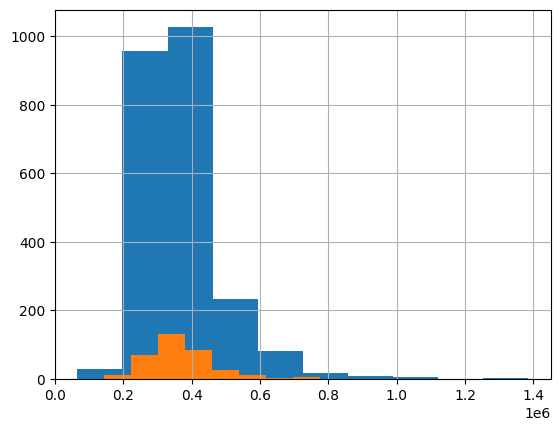

In [113]:
# Ideally, this should be plotted against the data frame as a whole...
df[df['property_use_code'].isin(['RESSD - DETACHED SINGLE DWELLING','CNCMP - CONDO COMPLEX','RESDU - DUPLEX','RESSS - SIDE BY SIDE','RESMU - RESIDENTIAL MULTIPLE USE','RESRM - ROOMING HOUSE','RESMC - MULTIFAMILY CONVERSION'])].total_assessed_value.hist()
with_garden[with_garden['property_use_code'].isin(['RESSD - DETACHED SINGLE DWELLING','CNCMP - CONDO COMPLEX','RESDU - DUPLEX','RESSS - SIDE BY SIDE','RESMU - RESIDENTIAL MULTIPLE USE','RESRM - ROOMING HOUSE','RESMC - MULTIFAMILY CONVERSION'])].total_assessed_value.hist()


It appears the houses with gardens (seen above in orange) roughly match the property value layout of the broader neighbourhood!

In [206]:
df[df['property_use_code'].isin(['RESSD - DETACHED SINGLE DWELLING','CNCMP - CONDO COMPLEX','RESDU - DUPLEX','RESSS - SIDE BY SIDE','RESMU - RESIDENTIAL MULTIPLE USE','RESRM - ROOMING HOUSE','RESMC - MULTIFAMILY CONVERSION'])].total_assessed_value.describe()


count      2360.000
mean     369908.038
std      119179.740
min       65350.000
25%      296000.000
50%      346000.000
75%      415000.000
max     1385000.000
Name: total_assessed_value, dtype: float64

The average property value is a tiiiiny bit higher among properties with gardens compared to the average

### What portion of the gardens come from what streets?

<Axes: ylabel='street_name'>

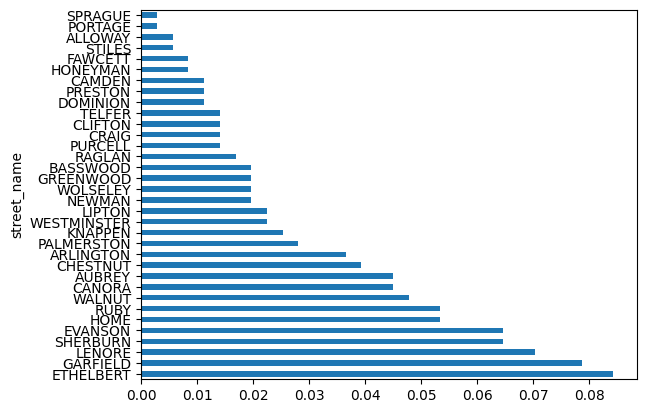

In [142]:
(with_garden['street_name'].value_counts()/356).plot(
    kind='barh'
)

## Relative position...are there more gardens in the southern half of the neighbourhood?



In [199]:
# The approximate center of Wolseley is at Westminster, or approximately a lat of 49.8815
# This is SUCH an approximation, but good enough for now
# I am going to create column "position" with a value either North or South of that line

with_garden['position'] = with_garden['centroid_lat'].apply(lambda lat: 'North' if lat > 49.8815 else 'South')

/var/folders/1d/j2lx647d3235w452yff34nqh0000gp/T/ipykernel_40640/2539488643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_garden['position'] = with_garden['centroid_lat'].apply(lambda lat: 'North' if lat > 49.8815 else 'South')


In [200]:
with_garden

,roll_number,full_address,has_garden,total_assessed_value,block_id,street_number,street_name,property_use_code,geometry,centroid_lat,centroid_lon,position
11,12090219000.000,38 ALLOWAY AVENUE,True,513000.000,44.000,38.000,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16231891160473 49.88342589...,49.883,-97.162,North
19,12090189000.000,51 ALLOWAY AVENUE,True,404000.000,44.000,51.000,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16290754293672 49.88389805...,49.884,-97.163,North
23,12082138000.000,14 ARLINGTON STREET,True,307000.000,28.000,14.000,ARLINGTON,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17043887041784 49.87772508...,49.878,-97.170,South
24,12082139000.000,16 ARLINGTON STREET,True,290000.000,28.000,16.000,ARLINGTON,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17043184695773 49.87782092...,49.878,-97.170,South
28,12082410000.000,21 ARLINGTON STREET,True,249000.000,28.000,21.000,ARLINGTON,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16939364332399 49.87800198...,49.878,-97.170,South
...,...,...,...,...,...,...,...,...,...,...,...,...
2452,12082890000.000,830 WOLSELEY AVENUE,True,678000.000,49.000,830.000,WOLSELEY,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.16578851939897 49.87924054...,49.879,-97.166,South
2457,12082736000.000,852 WOLSELEY AVENUE,True,312000.000,49.000,852.000,WOLSELEY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.1673606674682 49.879119351...,49.879,-97.167,South
2462,12082740000.000,867 WOLSELEY AVENUE,True,601000.000,49.000,867.000,WOLSELEY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16714868681586 49.87968113...,49.880,-97.167,South
2463,12082702000.000,871 WOLSELEY AVENUE,True,329000.000,49.000,871.000,WOLSELEY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.16779689146172 49.87969839...,49.880,-97.168,South


In [201]:
# Analyze values

with_garden.position.value_counts()

position
South    179
North    177
Name: count, dtype: int64

In [204]:
# Let's look at the map as a whole to see if this holds up

(df['centroid_lat']>49.8815).value_counts()

centroid_lat
False    1267
True     1215
Name: count, dtype: int64

In [205]:
# Wow! Suprisingly a fairly even split! 

In [207]:
with_garden.to_csv("gardens_only.csv")

## CREATING A MAP

In [22]:
import shapely
from shapely import wkt

In [26]:
df.drop([2482,2483], inplace=True)

In [31]:
df['geometry'] = df['geometry'].apply(wkt.loads)

In [32]:
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

<Axes: >

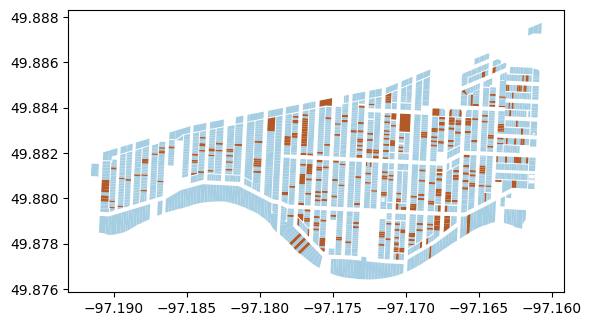

In [44]:
gdf.plot(column = 'has_garden', cmap='Paired')

In [147]:
gdf.to_file("gardens_mappable.geojson",  driver='GeoJSON')

In [155]:
road=gpd.read_file("westminster.geojson")

In [160]:
road = road.to_crs(gdf.crs)

<Axes: >

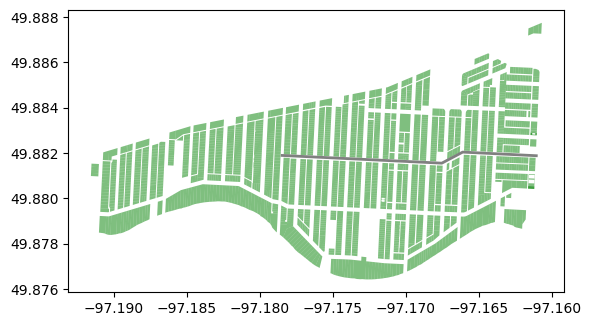

In [169]:
ax = road.plot(color='gray', edgecolor='black', linewidth=2, label='Road')  # Plot the road
gdf.plot(ax=ax, alpha=0.5, label='Houses', color='green')  # Plot the houses



In [188]:
gdf['position'] = gdf['centroid_lat'].apply(lambda x: 'North' if x > 49.882 else 'South')


In [189]:
gdf

,roll_number,full_address,has_garden,total_assessed_value,block_id,street_number,street_name,property_use_code,geometry,centroid_lat,centroid_lon,centroid,position
0,12090209000.000,11 ALLOWAY AVENUE,False,446000.000,44.000,11.000,ALLOWAY,RESDU - DUPLEX,"MULTIPOLYGON (((-97.1616 49.88386, -97.16162 4...",49.884,-97.162,POINT (-97.16154 49.88372),North
1,12090224000.000,14 ALLOWAY AVENUE,False,2249000.000,44.000,14.000,ALLOWAY,RESAP - APARTMENTS,"MULTIPOLYGON (((-97.16176 49.88341, -97.16178 ...",49.883,-97.162,POINT (-97.16164 49.88327),North
2,12090207000.000,19 ALLOWAY AVENUE,False,299000.000,44.000,19.000,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,"MULTIPOLYGON (((-97.16174 49.88359, -97.16172 ...",49.884,-97.162,POINT (-97.1618 49.88373),North
3,12090223000.000,20 ALLOWAY AVENUE,False,230000.000,44.000,20.000,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,"MULTIPOLYGON (((-97.16189 49.88341, -97.16191 ...",49.883,-97.162,POINT (-97.16183 49.88327),North
4,12090222000.000,22 ALLOWAY AVENUE,False,349000.000,44.000,22.000,ALLOWAY,RESSD - DETACHED SINGLE DWELLING,"MULTIPOLYGON (((-97.16204 49.88342, -97.16206 ...",49.883,-97.162,POINT (-97.16198 49.88328),North
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,12090005000.000,46 WOODROW PLACE,False,348000.000,47.000,46.000,WOODROW,RESSD - DETACHED SINGLE DWELLING,"MULTIPOLYGON (((-97.16256 49.87951, -97.16258 ...",49.879,-97.163,POINT (-97.16267 49.87916),South
2478,12090004000.000,48 WOODROW PLACE,False,415000.000,47.000,48.000,WOODROW,RESSD - DETACHED SINGLE DWELLING,"MULTIPOLYGON (((-97.1629 49.87952, -97.16294 4...",49.879,-97.163,POINT (-97.16284 49.87918),South
2479,12090003000.000,50 WOODROW PLACE,False,352000.000,47.000,50.000,WOODROW,RESSD - DETACHED SINGLE DWELLING,"MULTIPOLYGON (((-97.16307 49.87953, -97.16312 ...",49.879,-97.163,POINT (-97.16301 49.8792),South
2480,12090002000.000,52 WOODROW PLACE,False,435000.000,47.000,52.000,WOODROW,RESSD - DETACHED SINGLE DWELLING,"MULTIPOLYGON (((-97.16324 49.87953, -97.16328 ...",49.879,-97.163,POINT (-97.16318 49.87922),South
